In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [4]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [7]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])#编译模型


In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [9]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 254us/step - loss: 0.5084 - acc: 0.7819 - val_loss: 0.3799 - val_acc: 0.8681
Epoch 2/20
15000/15000 [==============================] - 3s 205us/step - loss: 0.3005 - acc: 0.9047 - val_loss: 0.3001 - val_acc: 0.8904
Epoch 3/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.2178 - acc: 0.9283 - val_loss: 0.3080 - val_acc: 0.8723
Epoch 4/20
15000/15000 [==============================] - 3s 195us/step - loss: 0.1747 - acc: 0.9437 - val_loss: 0.2842 - val_acc: 0.8831
Epoch 5/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.1422 - acc: 0.9545 - val_loss: 0.2843 - val_acc: 0.8868
Epoch 6/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.1146 - acc: 0.9652 - val_loss: 0.3185 - val_acc: 0.8776
Epoch 7/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.0976 - acc: 0.9711 - val_loss: 0.3132 - 

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

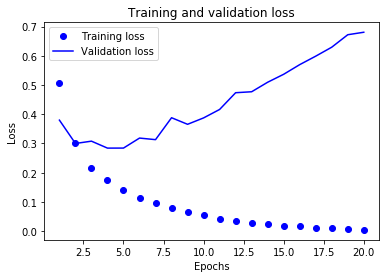

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

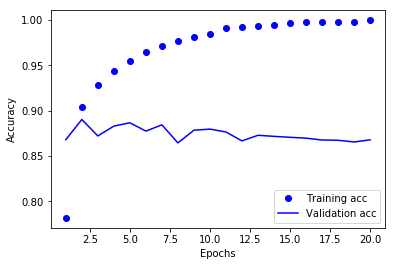

In [12]:
# plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 136us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 3s 125us/step - loss: 0.2665 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 3s 124us/step - loss: 0.1985 - acc: 0.9295
Epoch 4/4
25000/25000 [==============================] - 4s 147us/step


In [14]:
results

[0.32494617856979369, 0.87283999999999995]

In [15]:
model.predict(x_test)

array([[ 0.13815406],
       [ 0.99971074],
       [ 0.28206074],
       ..., 
       [ 0.07098755],
       [ 0.04228218],
       [ 0.47454193]], dtype=float32)